In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data= pd.read_csv('Iris.csv')
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df=data.copy()

In [12]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## DATA CLEANING

In [13]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [14]:
data[data.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [16]:
data.drop_duplicates(inplace=True)

## Feature Engineering or pre processing

In [19]:
# match species to numeric type
data['species']=data['species']. astype ('category').cat.codes
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


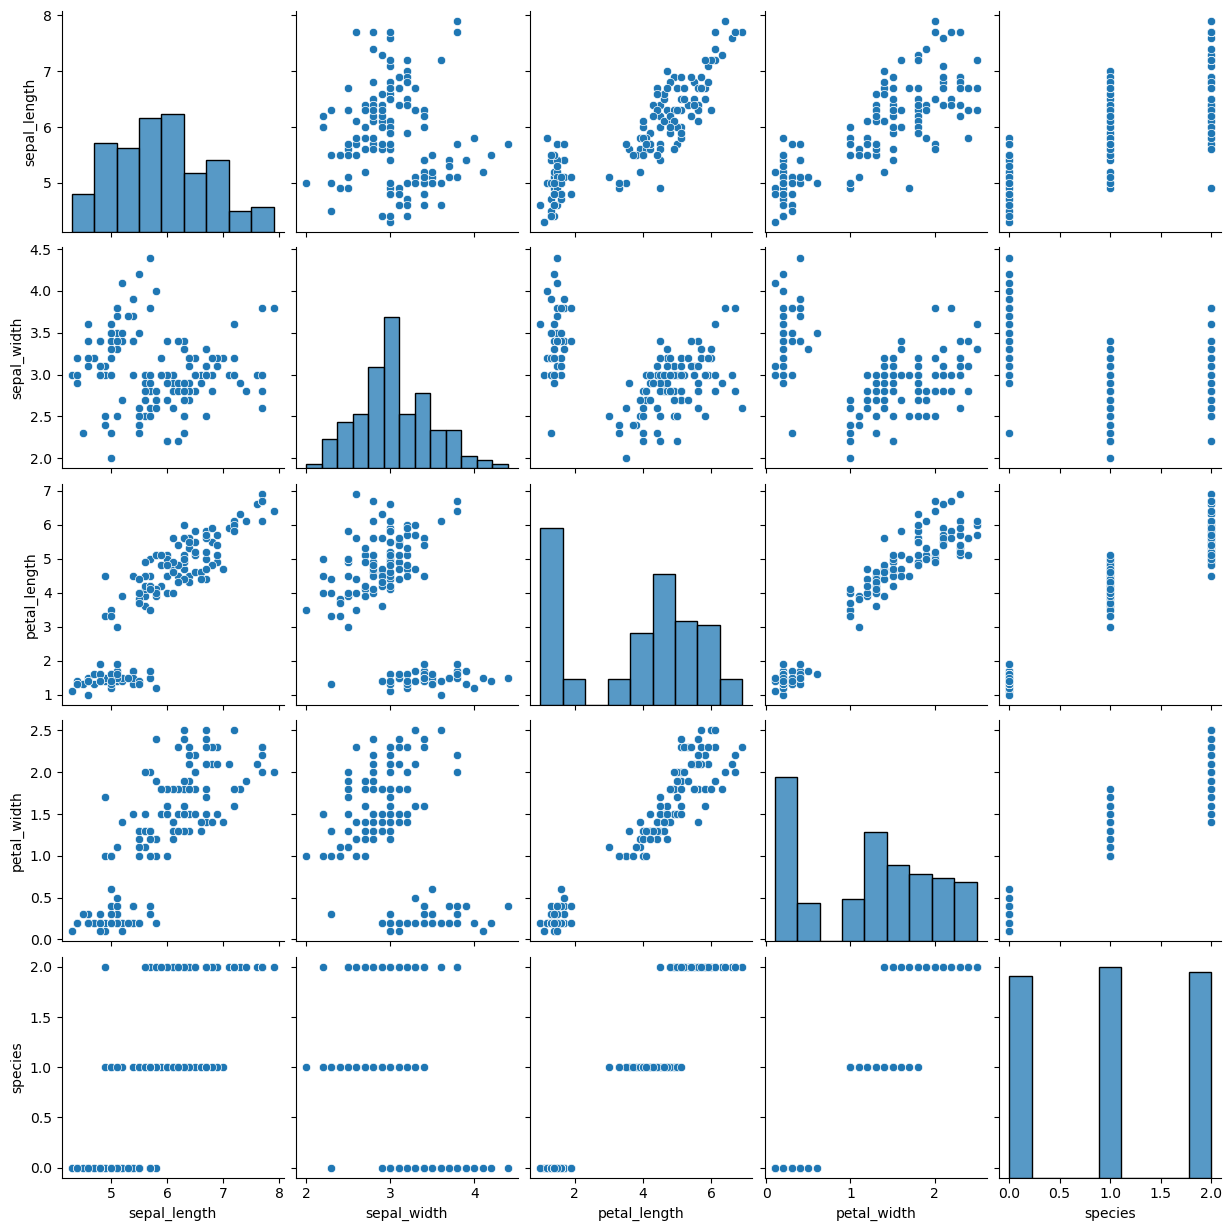

In [27]:
sns.pairplot(data)



In [26]:
corr=data.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


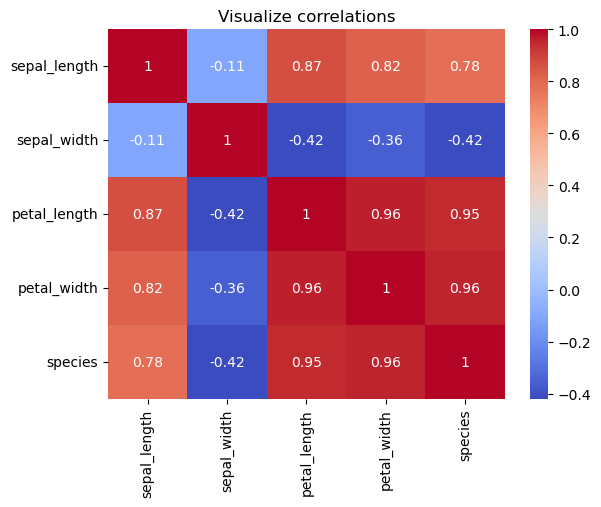

In [32]:
sns.heatmap(corr, annot=True, cmap= 'coolwarm')
plt.title ('Visualize correlations')
plt.show()

In [38]:
#splitting our sample into 2to split we use sklearn

from sklearn.model_selection import train_test_split

# features and target variable
# here we put the independent variables separate from the dependent variables
x= df.drop('species', axis=1)
y= df['species']

# to split the dataset into training and testing data
#test_size=0.3: This tells the function to use 30% of the data for testing and 70% for training.
#random_state=42: This ensures the split is the same every time you run the code, so you get consistent results.


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size =0.3, random_state=42)

## Modelling
# train logistic regression

In [36]:
#import logistic regression classification from sklearn
from sklearn.linear_model import LogisticRegression

# initialize logistic regression
logistic_model = LogisticRegression()

# fit the model to training data(x_train and y_train)
logistic_model.fit (x_train, y_train)

LogisticRegression()

## validating logistic regression

In [37]:
# predict the target variable for the test data (x_test)
y_pred_logistic= logistic_model.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score
print('Logistics Regression Results:')
print ('Accuracy:', accuracy_score(y_test, y_pred_logistic))

Logistics Regression Results:
Accuracy: 1.0


In [45]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [50]:
x= data[['sepal_length', 'petal_length', 'petal_width',
       'species']]
y= data['species']# target variable
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size =0.3, random_state=42)


In [51]:
# initialize logistic regression
logistic_model = LogisticRegression()

# fit the model to training data(x_train and y_train)
logistic_model.fit (x_train, y_train)

LogisticRegression()

In [52]:
# predict the target variable for the test data (x_test)
y_pred_logistic= logistic_model.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score
print('Logistics Regression Results:')
print ('Accuracy:', accuracy_score(y_test, y_pred_logistic))

Logistics Regression Results:
Accuracy: 1.0
